### Connect to Data Tables

In [2]:
import pandas as pd
import numpy as np
import sqlalchemy as sa
import seaborn as sns
import matplotlib.pyplot as plt
from sqlalchemy import Table, MetaData, Column, Integer, create_engine
import urllib
import pyodbc

In [3]:
pyodbc.drivers()

['ODBC Driver 13 for SQL Server',
 'ODBC Driver 18 for SQL Server',
 'ODBC Driver 17 for SQL Server']

In [4]:
server = ''
database = ''
username = ''
password = ''

params = urllib.parse.quote_plus('DRIVER={ODBC Driver 17 for SQL Server};SERVER='+server+';DATABASE='+database+';UID='+username+';PWD='+ password)

engine = sa.create_engine("mssql+pyodbc:///?odbc_connect=%s" % params)

In [5]:
connection = engine.connect()

In [6]:
get_atlas_age = """
SELECT TOP 20 *
FROM Zip_Atlas_Median_Age_Raw;
"""

atlas_age = pd.read_sql_query(get_atlas_age, connection)
atlas_age

,id,#,Zip Code,Location,City,Population,Avg. Population Age,National Rank
0,0,1,94111,"37.801776, -122.402293","San Francisco, California",3335,50.8,#652
1,1,2,94104,"37.791222, -122.402241","San Francisco, California",374,48.1,"#1,191"
2,2,3,94127,"37.736535, -122.457320","San Francisco, California",20624,44.8,"#2,545"
3,3,4,94108,"37.791998, -122.408653","San Francisco, California",13716,42.3,"#4,940"
4,4,5,94133,"37.802071, -122.411004","San Francisco, California",26827,42.2,"#5,055"
5,5,6,94116,"37.744410, -122.486764","San Francisco, California",42958,40.5,"#8,128"
6,6,7,94131,"37.746699, -122.442833","San Francisco, California",27897,39.4,"#10,915"
7,7,8,94121,"37.776718, -122.495781","San Francisco, California",42473,39.1,"#11,739"
8,8,9,94102,"37.779500, -122.419233","San Francisco, California",28991,38.2,"#14,548"
9,9,10,94114,"37.758085, -122.434801","San Francisco, California",30574,37.7,"#16,148"


In [7]:
get_atlas_income = """
SELECT TOP 20 *
FROM Zip_Atlas_Median_Household_Income_Raw;
"""

atlas_income = pd.read_sql_query(get_atlas_income, connection)
atlas_income

,id,#,Zip Code,Location,City,Population,Avg. Income/H/hold,National Rank
0,0,1.0,94127.0,"37.736535, -122.457320","San Francisco, California",20624.0,95313.0,#350
1,1,2.0,94105.0,"37.789168, -122.395009","San Francisco, California",2058.0,88976.0,#488
2,2,3.0,94123.0,"37.800254, -122.436975","San Francisco, California",22903.0,84710.0,#633
3,3,4.0,94130.0,"37.820894, -122.369725","San Francisco, California",1453.0,80959.0,#785
4,4,5.0,94131.0,"37.746699, -122.442833","San Francisco, California",27897.0,76044.0,"#1,042"
5,5,6.0,94114.0,"37.758085, -122.434801","San Francisco, California",30574.0,75727.0,"#1,062"
6,6,7.0,94129.0,"37.797526, -122.464531","San Francisco, California",2228.0,73571.0,"#1,212"
7,7,8.0,94116.0,"37.744410, -122.486764","San Francisco, California",42958.0,66627.0,"#1,928"
8,8,9.0,94117.0,"37.770533, -122.445121","San Francisco, California",38738.0,63983.0,"#2,270"
9,9,10.0,94121.0,"37.776718, -122.495781","San Francisco, California",42473.0,61776.0,"#2,604"


In [8]:
get_atlas_population = """
SELECT TOP 20 *
FROM Zip_Atlas_Population_Density_Raw;
"""

atlas_population = pd.read_sql_query(get_atlas_population, connection)
atlas_population

,id,#,Zip Code,Location,City,Population,People / Sq. Mile,National Rank
0,0,1,94108,"37.791998, -122.408653","San Francisco, California",13716,53134.47,#48
1,1,2,94109,"37.794487, -122.422270","San Francisco, California",56322,46521.46,#64
2,2,3,94102,"37.779500, -122.419233","San Francisco, California",28991,44719.24,#71
3,3,4,94133,"37.802071, -122.411004","San Francisco, California",26827,40117.97,#77
4,4,5,94110,"37.750021, -122.415201","San Francisco, California",74633,31343.73,#111
5,5,6,94115,"37.786031, -122.437301","San Francisco, California",33115,29461.94,#121
6,6,7,94117,"37.770533, -122.445121","San Francisco, California",38738,27861.23,#125
7,7,8,94123,"37.800254, -122.436975","San Francisco, California",22903,22681.01,#165
8,8,9,94114,"37.758085, -122.434801","San Francisco, California",30574,22377.49,#167
9,9,10,94112,"37.720498, -122.443119","San Francisco, California",73104,22097.56,#171


#### Remove Columns

In [9]:
atlas_age.drop(['Location','City','National Rank', '#','id'], axis=1, inplace=True)
atlas_population.drop(['Location','City','National Rank', '#','id'], axis=1, inplace=True)
atlas_income.drop(['Location','City','National Rank', '#','id'], axis=1, inplace=True)

In [10]:
atlas_age.head()

,Zip Code,Population,Avg. Population Age
0,94111,3335,50.8
1,94104,374,48.1
2,94127,20624,44.8
3,94108,13716,42.3
4,94133,26827,42.2


In [11]:
atlas_population.head()

,Zip Code,Population,People / Sq. Mile
0,94108,13716,53134.47
1,94109,56322,46521.46
2,94102,28991,44719.24
3,94133,26827,40117.97
4,94110,74633,31343.73


In [12]:
atlas_income.head()

,Zip Code,Population,Avg. Income/H/hold
0,94127.0,20624.0,95313.0
1,94105.0,2058.0,88976.0
2,94123.0,22903.0,84710.0
3,94130.0,1453.0,80959.0
4,94131.0,27897.0,76044.0


#### Replace Column Name Spaces

In [13]:
atlas_age.columns = [c.replace(' ', '_') for c in atlas_age.columns]
atlas_income.columns = [c.replace(' ', '_') for c in atlas_income.columns]
atlas_population.columns = [c.replace(' ', '_') for c in atlas_population.columns]

atlas_age.columns = [c.replace('/', '_') for c in atlas_age.columns]
atlas_income.columns = [c.replace('/', '_') for c in atlas_income.columns]
atlas_population.columns = [c.replace('/', '_') for c in atlas_population.columns]

atlas_age.columns = [c.replace('.', '') for c in atlas_age.columns]
atlas_income.columns = [c.replace('.', '') for c in atlas_income.columns]
atlas_population.columns = [c.replace('.', '') for c in atlas_population.columns]

#### Adjust Data Types

In [14]:
atlas_age.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Zip_Code            20 non-null     int64  
 1   Population          20 non-null     int64  
 2   Avg_Population_Age  20 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 608.0 bytes


In [15]:
atlas_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Zip_Code           20 non-null     float64
 1   Population         20 non-null     float64
 2   Avg_Income_H_hold  20 non-null     float64
dtypes: float64(3)
memory usage: 608.0 bytes


In [16]:
atlas_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Zip_Code          20 non-null     int64  
 1   Population        20 non-null     int64  
 2   People___Sq_Mile  20 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 608.0 bytes


#### Data Cleanup

In [17]:
# convert columns to correct data types
atlas_age['Population'] = atlas_age['Population'].astype(int)
atlas_age['Avg_Population_Age'] = atlas_age['Avg_Population_Age'].astype(float)
atlas_age['Zip_Code'] = atlas_age['Zip_Code'].astype(str)

atlas_income['Population'] = atlas_income['Population'].astype(int)
atlas_income['Avg_Income_H_hold'] = atlas_income['Avg_Income_H_hold'].astype(int)
atlas_income['Zip_Code'] = atlas_income['Zip_Code'].astype(str)

atlas_population['Population'] = atlas_population['Population'].astype(int)
atlas_population['People___Sq_Mile'] = atlas_population['People___Sq_Mile'].astype(float)
atlas_population['Zip_Code'] = atlas_population['Zip_Code'].astype(str)

In [18]:
#remove trailing zeros in zip code
atlas_income['Zip_Code'] = atlas_income['Zip_Code'].str[:5]

In [19]:
#join age and income dataframes
outer_merged = pd.merge(atlas_age, atlas_income, how="outer", on=["Zip_Code"])

In [20]:
#join merged with population dataframes
atlas_merged = pd.merge(outer_merged, atlas_population, how="outer", on=["Zip_Code"])

In [21]:
atlas_merged['Population'] = np.where(~atlas_merged['Population_x'].isnull(),atlas_merged['Population_x'],atlas_merged['Population'])
atlas_merged['Population'] = np.where(~atlas_merged['Population_y'].isnull(),atlas_merged['Population_x'],atlas_merged['Population'])

In [22]:
atlas_merged.drop(['Population_x','Population_y'], axis=1, inplace=True)

#### Exploratory Analysis

In [23]:
atlas_merged.describe()

,Avg_Population_Age,Avg_Income_H_hold,Population,People___Sq_Mile
count,20.000000,20.000000,20.000000,20.00000
mean,39.330000,66352.400000,30180.400000,24147.32300
std,4.304233,13571.433025,18745.216974,13191.65466
min,35.300000,43444.000000,374.000000,7017.26000
25%,36.400000,56176.750000,19810.000000,16071.86500
50%,37.300000,61692.500000,28444.000000,22085.46000
75%,40.925000,75806.250000,40718.750000,29932.38750
max,50.800000,95313.000000,73104.000000,53134.47000


In [24]:
# Check for null values
pd.isnull(atlas_merged).values.any()

True

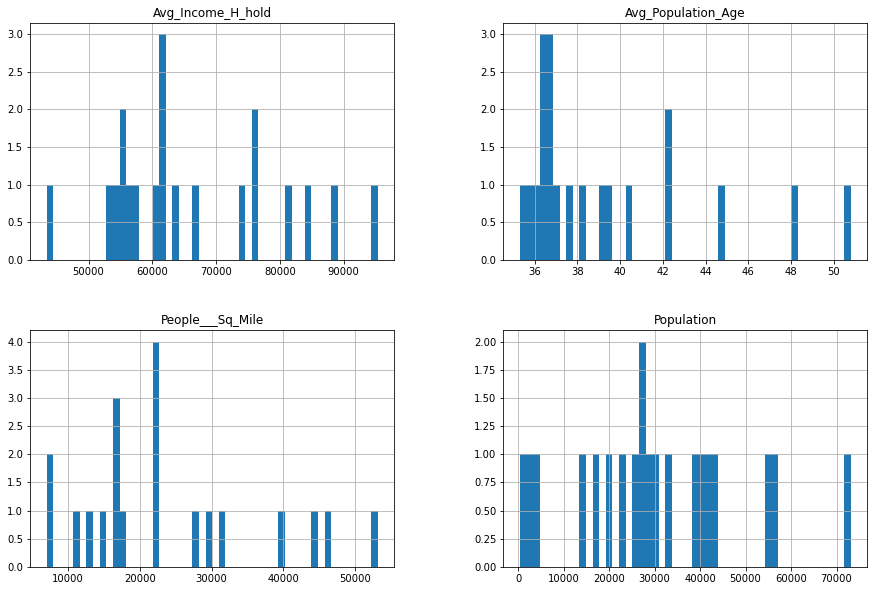

In [25]:
## Histogram on cont variables
atlas_merged.hist(bins=50, figsize=(15,10));

In [26]:
print(atlas_merged.skew())

Zip_Code              0.205783
Avg_Population_Age    1.544343
Avg_Income_H_hold     0.618949
Population            0.380053
People___Sq_Mile      0.837596
dtype: float64


After running the skewness test we can see that values close to 0 show less skew and values farther away show the most skew. Avg population age is the most skewed.

#### Correlation Matrix

In [27]:
corr_matrix  =  atlas_merged.corr()

In [28]:
corr_matrix

,Avg_Population_Age,Avg_Income_H_hold,Population,People___Sq_Mile
Avg_Population_Age,1.000000,0.239534,-0.534099,-0.131602
Avg_Income_H_hold,0.239534,1.000000,-0.486811,-0.447035
Population,-0.534099,-0.486811,1.000000,0.100169
People___Sq_Mile,-0.131602,-0.447035,0.100169,1.000000


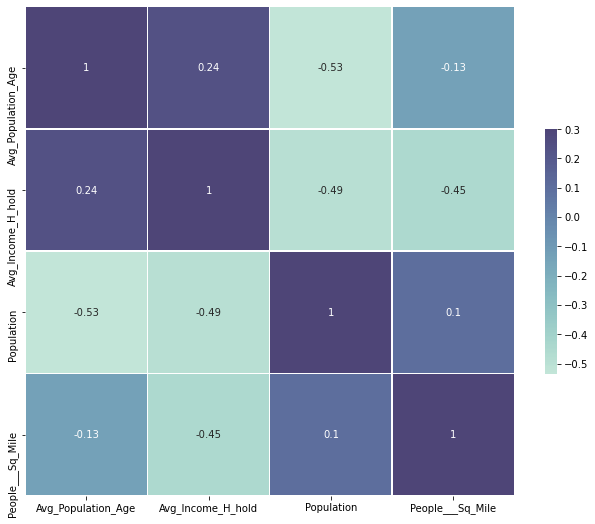

In [29]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
sns.heatmap(corr_matrix, cmap=cmap, vmax=.3, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = True)

In [30]:
atlas_merged

,Zip_Code,Avg_Population_Age,Avg_Income_H_hold,Population,People___Sq_Mile
0,94111,50.8,56569.0,3335.0,7017.26
1,94104,48.1,NaN,374.0,NaN
2,94127,44.8,95313.0,20624.0,10969.80
3,94108,42.3,NaN,13716.0,53134.47
4,94133,42.2,NaN,26827.0,40117.97
5,94116,40.5,66627.0,42958.0,16629.92
6,94131,39.4,76044.0,27897.0,13070.88
7,94121,39.1,61776.0,42473.0,14397.70
8,94102,38.2,NaN,28991.0,44719.24
9,94114,37.7,75727.0,30574.0,22377.49
